# Project
#### Group Members

| ID | Name | 
|----------|----------|
|1191302190|Amin Ahmed Mohammedelhassan Alawad|
|1191202335|Ayat Abdulaziz Gaber Al-Khulaqi|
|1191202539|Iven Low Zi Yin |



# Reqiurement  

**To discover hidden patterns, your work should incorporate at least:**

- 3 classification techniques
- 1 clustering technique
- 1 association rule mining technique



# Structure
**the code should apply all the below pionts:**

 - Planning of code and analysis
 - Exploratory data analysis
 - Reasoning about data and model chosen
 - Programming execution and reproducibility of results
 - Programming Clarity
 
**temporarily cell**

## Importing libraries

General libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

Skew calculation Library

In [2]:
from scipy.stats import skew

Muchine Learing libararies

In [3]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import pyfpgrowth

Evaluation libararies

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

Map Libararies

In [5]:
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim

#### Reading the data

In [6]:
df = pd.read_csv("msr3.csv")

# Overview

In [7]:
df.shape

(7178, 31)

In [8]:
df.head()

,country,gender,age,yr_mrr,chd,chda,edu,physio,raf,rel,...,ms2,ms3,scoll1,scoll2,scoll3,scoll4,icoll1,icoll2,icoll3,icoll4
0,Brazil,1,21.0,2.0,0,0,5,3,1,4,...,1,1,1,1,1,1,1,1,1,1
1,Brazil,1,29.0,3.0,1,0,5,3,1,2,...,2,2,2,1,1,1,1,1,1,1
2,Brazil,1,30.0,7.0,0,0,5,3,1,4,...,1,1,2,1,2,1,1,1,1,1
3,Brazil,1,30.0,7.0,1,1,5,3,1,2,...,2,2,3,1,1,2,1,1,1,1
4,Brazil,1,28.0,9.0,0,0,4,2,1,3,...,2,1,3,2,3,2,1,1,1,1


In [9]:
df.tail()

,country,gender,age,yr_mrr,chd,chda,edu,physio,raf,rel,...,ms2,ms3,scoll1,scoll2,scoll3,scoll4,icoll1,icoll2,icoll3,icoll4
7173,Uganda,1,32.0,7.0,2,3,5,1,10,4,...,3,3,2,2,2,7,2,2,2,7
7174,Uganda,1,36.0,6.0,4,4,5,3,,4,...,2,2,2,2,2,3,3,2,1,1
7175,Uganda,1,32.0,2.0,1,1,5,2,,1,...,1,1,1,1,4,2,1,2,4,2
7176,Uganda,1,27.0,3.0,2,2,5,2,,1,...,1,2,1,2,3,4,3,3,2,3
7177,Uganda,1,53.0,24.0,6,1,5,3,,2,...,3,3,1,1,2,3,1,1,2,5


---
# Data Cleaning and Preprocessing

## Overview of the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7178 non-null   object 
 1   gender   7178 non-null   int64  
 2   age      7178 non-null   float64
 3   yr_mrr   7178 non-null   float64
 4   chd      7178 non-null   int64  
 5   chda     7178 non-null   int64  
 6   edu      7178 non-null   int64  
 7   physio   7178 non-null   int64  
 8   raf      7178 non-null   object 
 9   rel      7178 non-null   int64  
 10  safety   7178 non-null   int64  
 11  love4    7178 non-null   int64  
 12  happy    7178 non-null   int64  
 13  esteem2  7178 non-null   int64  
 14  love5    7178 non-null   int64  
 15  love3    7178 non-null   int64  
 16  esteem1  7178 non-null   int64  
 17  sact     7178 non-null   int64  
 18  love2    7178 non-null   int64  
 19  love1    7178 non-null   int64  
 20  ms1      7178 non-null   int64  
 21  ms2      7178 

In [11]:
df.describe()

,gender,age,yr_mrr,chd,chda,edu,physio,rel,safety,love4,...,ms2,ms3,scoll1,scoll2,scoll3,scoll4,icoll1,icoll2,icoll3,icoll4
count,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,...,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000
mean,1.533157,40.665018,14.760102,1.766648,1.466982,4.242965,2.616606,3.962803,3.656729,1.442045,...,2.227919,2.281833,2.492338,1.986486,3.547088,2.683199,2.192254,1.885483,3.398440,2.989412
std,0.498934,11.446824,11.587541,1.307748,1.383066,0.949635,0.838241,1.777629,1.951630,0.804958,...,1.460221,1.494538,1.460362,1.430655,1.819215,1.766169,1.529274,1.470525,1.959335,1.922027
min,1.000000,17.000000,0.080000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,32.000000,5.000000,1.000000,0.000000,4.000000,2.000000,3.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,12.000000,2.000000,1.000000,5.000000,3.000000,4.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000
75%,2.000000,49.000000,23.000000,2.000000,2.000000,5.000000,3.000000,5.000000,5.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000,3.000000,2.000000,5.000000,4.000000
max,2.000000,88.000000,70.000000,12.000000,13.000000,5.000000,6.000000,7.000000,7.000000,6.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


> The data appears to be consistent, complete, and does not have any missing values.

## Checking for duplicates

In [12]:
sum(df.duplicated())

56

 > The data was collected from a survey. Each row represents an individual state, even if it is repeated or duplicated. Therefore, dropping the duplicated rows is not required.

## Checking for missing values

In [13]:
df=df.replace(' ' , np.nan)

In [14]:
df.isna().sum()

country     0
gender      0
age         0
yr_mrr      0
chd         0
chda        0
edu         0
physio      0
raf        86
rel         0
safety      0
love4       0
happy       0
esteem2     0
love5       0
love3       0
esteem1     0
sact        0
love2       0
love1       0
ms1         0
ms2         0
ms3         0
scoll1      0
scoll2      0
scoll3      0
scoll4      0
icoll1      0
icoll2      0
icoll3      0
icoll4      0
dtype: int64

In [15]:
print(f'number of missing value is: {df.raf.isna().sum()}')

number of missing value is: 86


>  We can see that there are 86 missing values in the **raf** column, which represents the **current religious affiliation.** Since the numbers in the column represent different religions, we can assume that the empty values do not represent any religion. As a solution, we can fill these missing values with the number 6, which corresponds to **None** in the original survey. 

In [16]:
df['raf'] = df['raf'].fillna(6)

cheking the number of the missing value after modification

In [17]:
df['raf'].isna().sum()

0

##### Initial setting to visualize the data

In [18]:
color = 'teal'
fontsize = 12
sns.set_style('whitegrid')
linestyle = '--'
palette = sns.color_palette(f"light:{color}", n_colors=5)
cmap = sns.color_palette(f"light:{color}", as_cmap=True)

## skewness analysis

 Calculate skewness

In [19]:
numeric_columns = df.select_dtypes(include=np.number).columns
skewness_results = {}

for column in numeric_columns:
    skewness_results[column] = skew(df[column])

df_skewness = pd.DataFrame.from_dict(skewness_results, orient='index', columns=['Skewness'])

Plot skewness values with custom color

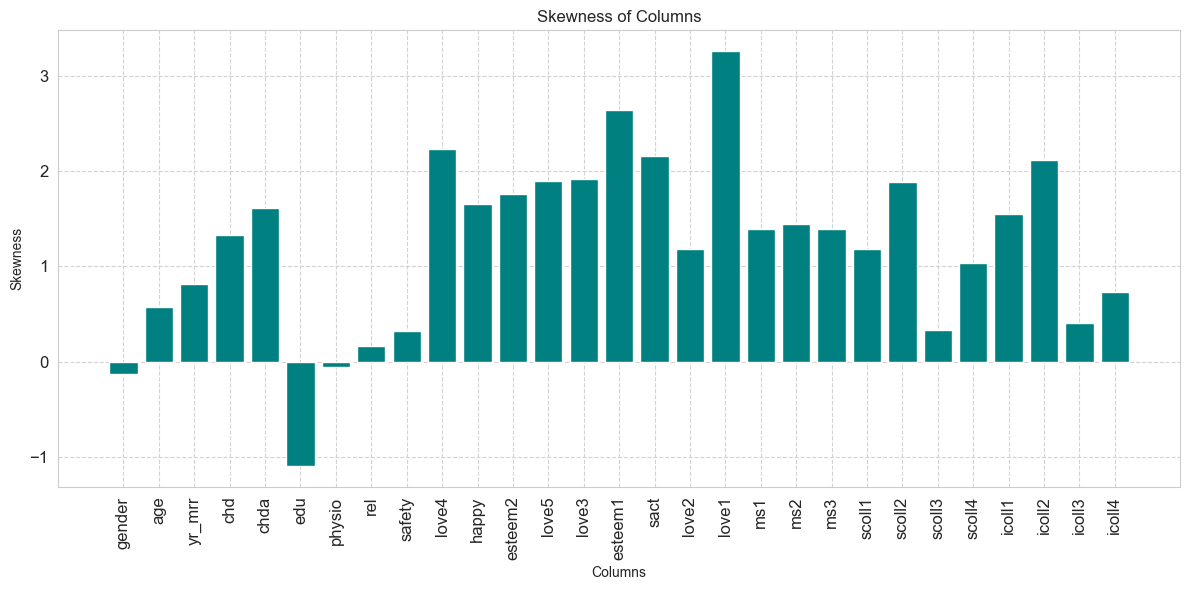

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(df_skewness.index, df_skewness['Skewness'], color=color)  
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Columns')
plt.xticks(rotation=90)
plt.grid(color='lightgray', linestyle=linestyle)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tight_layout()

plt.show()

 Separate right-skewed and left-skewed columns

In [21]:
right_skewed = df_skewness[df_skewness['Skewness'] > 0.5]
left_skewed = df_skewness[df_skewness['Skewness'] < -0.5]

>  Skewness values close to 0 (between -0.5 and 0.5) indicate that the distribution is approximately symmetric

Plot right-skewed columns

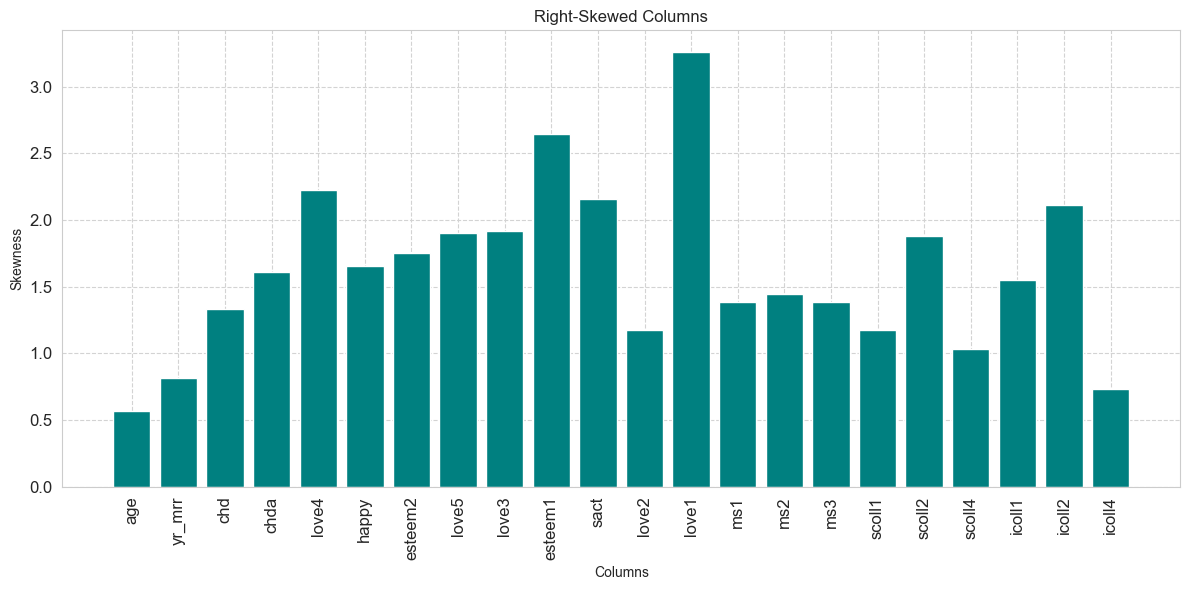

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(right_skewed.index, right_skewed['Skewness'], color=color)
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Right-Skewed Columns')
plt.xticks(rotation=90)
plt.grid(color='lightgray', linestyle='--')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tight_layout()

plt.show()

Plot left-skewed columns

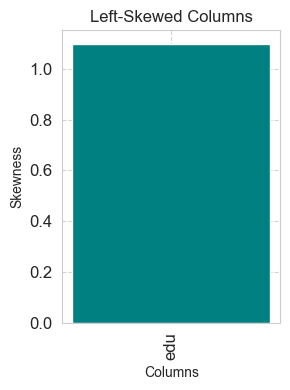

In [23]:
plt.figure(figsize=(3, 4))
plt.bar(left_skewed.index, left_skewed['Skewness']*-1, color=color)
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Left-Skewed Columns')
plt.xticks(rotation=90)
plt.grid(color='lightgray', linestyle=linestyle)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tight_layout()

plt.show()

> **Note:** While skewed data can still provide valuable insights and meaningful interpretations, it is important to consider the implications of skewness in the marriage survey data. The skewed distribution of responses may reflect the diverse range of experiences and attitudes towards marriage.

Given the skewness in the data, using non-linear models would be a wise choice since linear models rely on the assumption of normally distributed data.

## Feature Scaling

The majority of features in the data fall within the range of 1 and 7, excluding personal information such as age, gender, number of children, etc. It is observed that the range of 1 to 7 is relatively close, indicating that scaling or generalization may not be necessary. 


---
# Exploratory Data Analysis

### General Ploting

#### Gender comparison

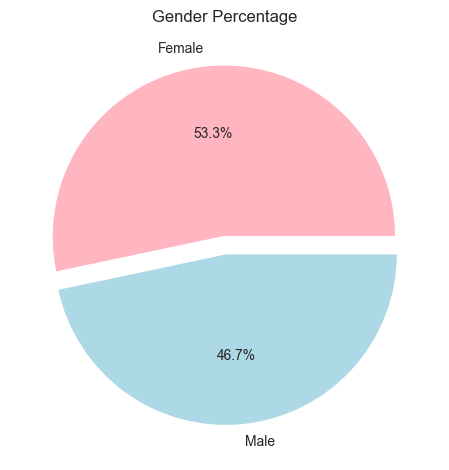

In [24]:
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts.values, labels=["Female", "Male"],
        autopct='%1.1f%%', colors=['lightpink', 'lightblue'], explode=(0.05, 0.05))
plt.title('Gender Percentage')
plt.tight_layout()

plt.show()

#### Age distribution 

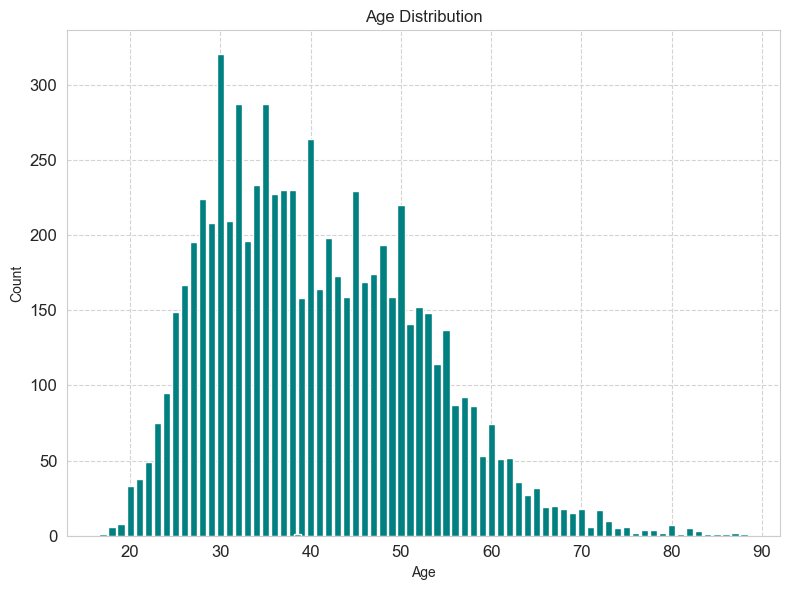

In [25]:
age_counts = df['age'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(age_counts.index, age_counts.values, color = color)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.grid(color='lightgray', linestyle=linestyle)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tight_layout()

plt.show()

#### Age compered to Years of marrige

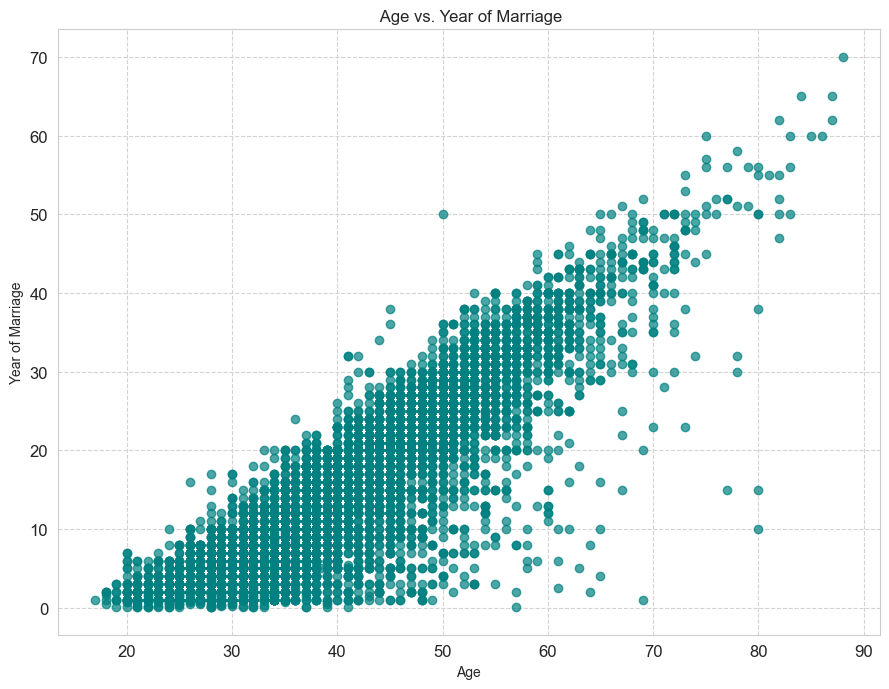

In [26]:
plt.figure(figsize=(9,7))
plt.scatter(df['age'], df['yr_mrr'], color=color, alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Year of Marriage')
plt.title(' Age vs. Year of Marriage')

plt.grid(color='lightgray', linestyle=linestyle)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tight_layout()

plt.show()

#### Count Number of samples in each country

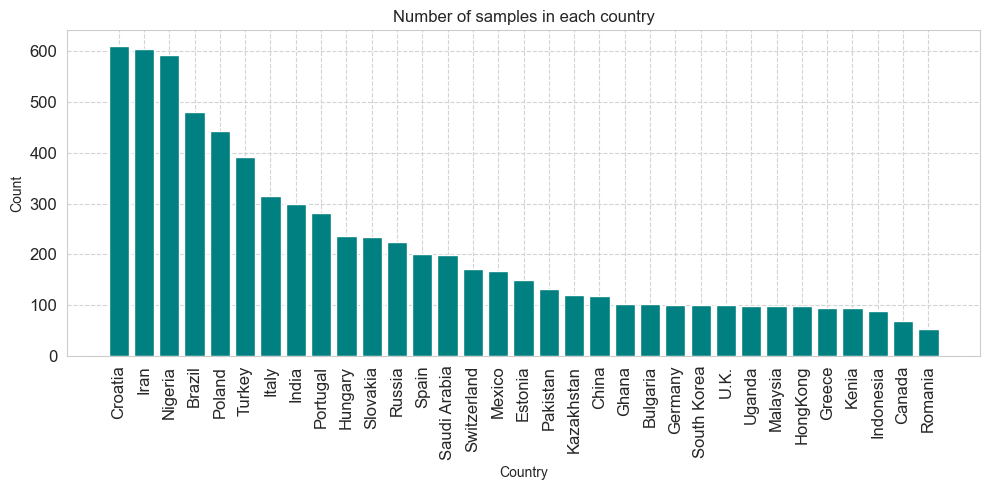

In [27]:
country_counts = df['country'].value_counts()

plt.figure(figsize = (10,5))
plt.bar(country_counts.index, country_counts.values, color = color)

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of samples in each country')
plt.xticks(rotation=90)
plt.grid(color='lightgray', linestyle=linestyle)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tight_layout()

plt.show()

### Ploting the countries on the Map

Initialize map objects

In [28]:
country_counts = df['country'].value_counts()
map = folium.Map()
geolocator = Nominatim(user_agent="my_map")
marker_cluster = MarkerCluster().add_to(map)

 Iterate through each country and count number of rows then set its location in the map 

In [29]:
for country in df['country'].unique():
    country_data = df[df['country'] == country]
    country_count = country_counts[country]
    
    try:
        location = geolocator.geocode(country)
        latitude = location.latitude
        longitude = location.longitude
        
        folium.Marker(location=[latitude, longitude], popup=f'{country}: {country_count}').add_to(marker_cluster)
    except:
        continue

#### Display the map

In [30]:
map

### correlation matrix

calculating the correlation matrix 

In [31]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

 Display top 5 related features

In [32]:
top_corr = correlation_matrix.unstack().sort_values(ascending=False)
top_corr = top_corr[top_corr != 1][::2][:5]
print(top_corr)

ms1     ms2       0.889306
ms2     ms3       0.881832
age     yr_mrr    0.879498
ms3     ms1       0.854192
icoll1  icoll2    0.687181
dtype: float64


### Heat map

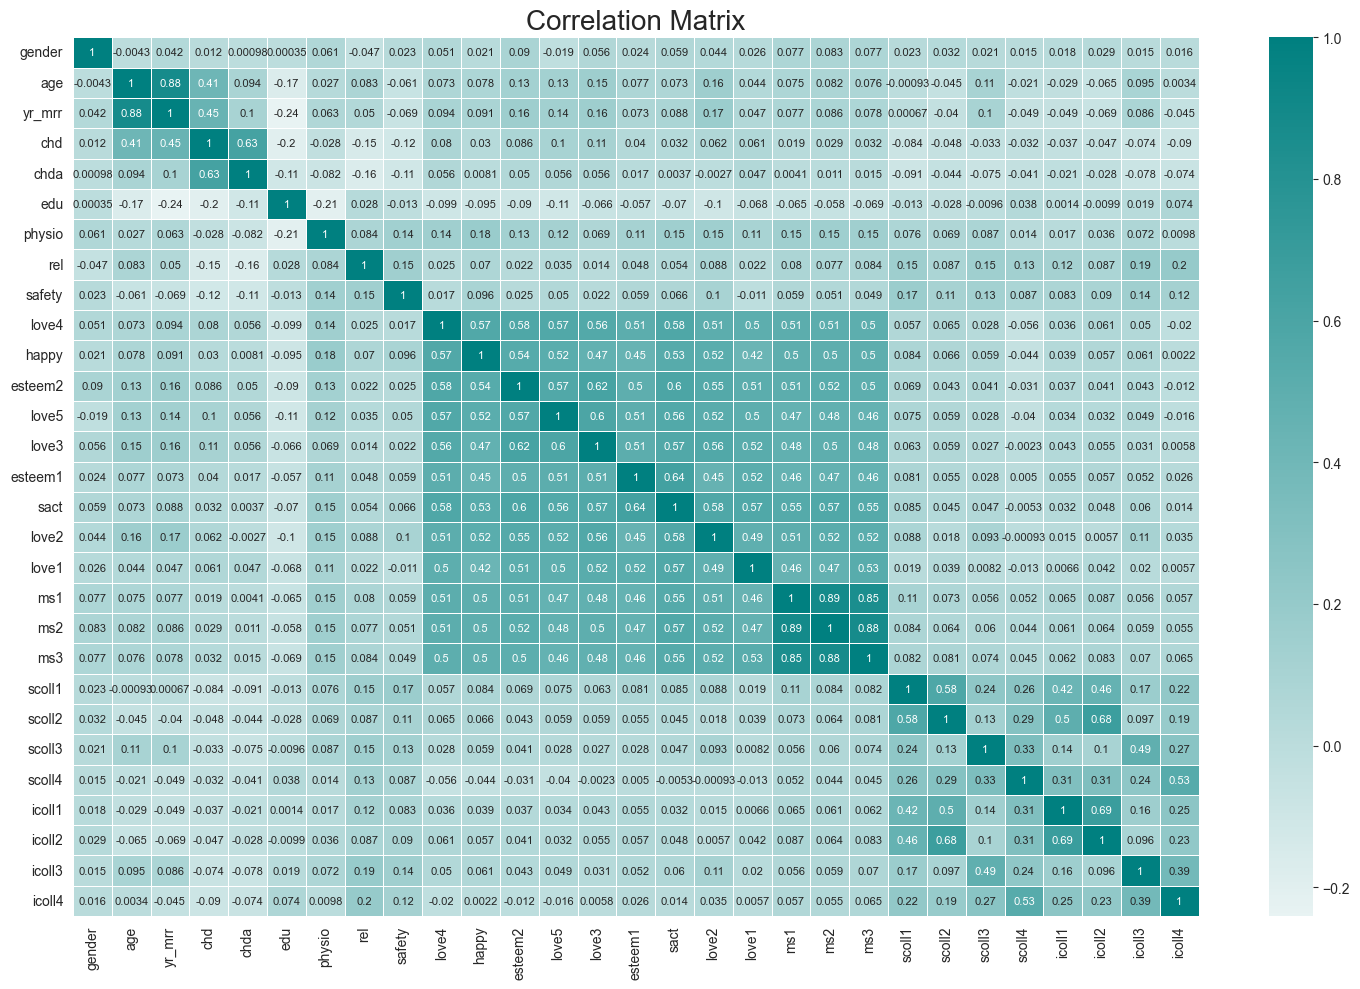

In [33]:
sns.set_style('white')

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, annot_kws={'fontsize': 8}, cmap=cmap, linewidths=0.5)

plt.title('Correlation Matrix', fontsize=20)
plt.tight_layout()

plt.show()

--- 
# Feature Selection 

### Selecting the taget 

Setting the overall marriage satisfaction, represented by the **ms1** column, as the target for the study.

### choosing Feature Selection Method

The chosen feature selection method should meet the following conditions:

- The dataset has 30 features, so eliminating low correlated features is necessary to reduce computational expenses during training.
- Flexibility is important, allowing the method to be applied with different machine learning algorithms.
- An automated searching process without manual feature engineering is desired.
- The method should enhance interpretability by reducing the dataset's dimensionality.

> **Recursive Feature Elimination (RFE)** satisfies these conditions. It eliminates low correlated features, works with various algorithms, offers an automated feature selection process, and improves interpretability by reducing dimensionality. Therefore, RFE is the suitable choice for feature selection in this project.

## implementing Recursive Feature Elimination (RFE)

 setting features and target

In [34]:
y = df['ms1'] 
X = df.drop(['ms1', 'country'], axis=1)

 Split the data into training and testing sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### caculating the best number of feature

Define the range of potential numbers of features

In [36]:
feature_range = range(1,30)

 Initialize estimator and dictionary to store the performanc

In [37]:
estimator = LinearRegression()
metric_scores = {}

#### Perform cross-validation for each number of features

In [38]:
for num_features in feature_range:
    rfe = RFE(estimator, n_features_to_select=num_features)
    rfe.fit(X_train, y_train)
    
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)
    
    estimator.fit(X_train_selected, y_train)
    
    scores = cross_val_score(estimator, X_test_selected, y_test, cv=5, scoring='r2')
    metric_scores[num_features] = scores.mean()

Find the number of features with the highest performance metric score

In [39]:
best_num_features = max(metric_scores, key=metric_scores.get)
best_score = metric_scores[best_num_features]

#### Print the result

In [40]:
print("Best Number of Features:", best_num_features)
print("Best Performance Score:", best_score)

Best Number of Features: 10
Best Performance Score: 0.8184706079497748



> **Note:** The results indicate that the best performance is achieved when using **10** features. Therefore, we will select these 10 features for the final selection and proceed with the modeling phase.

#### implementing feature selection by using all the data

In [41]:
rfe = RFE(estimator, n_features_to_select=10)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]

#### finalize the target and selected features

In [42]:
df_features = df[selected_features]
df_target = df['ms1'] 

---
# Model Selection

## Classification 
The selection of these three methods, namely Decision Trees, Naive Bayes, and Support Vector Machines (SVM), is based on their versatility, popularity, and effectiveness in various data mining tasks. Here are the reasons for selecting these methods:
### 1. Decision Trees:

- **Interpretability:** Decision trees provide clear and interpretable rules for decision-making. The generated tree structure can be easily understood and visualized, making it useful for explaining patterns and insights to stakeholders.


- **Non-parametric nature:** Decision trees do not require strong assumptions about the underlying data distribution, making them suitable for different types of data.


### 2. Naive Bayes:

- **Simplicity and efficiency:** Naive Bayes is computationally efficient and simple to implement. It performs well even with limited training data, making it suitable for large datasets. 


- **Probabilistic framework:** Naive Bayes leverages probability theory to calculate the likelihood of an instance belonging to a certain class. It can handle missing values even though there none in our data and works well with high-dimensional data.


- **Independence assumption:** Although the assumption of independence between features is often violated in real-world scenarios, Naive Bayes can still provide reasonable results and performs particularly well when the independence assumption holds or is approximately true.

### 3. Support Vector Machines (SVM):

- **Effective in high-dimensional spaces:** SVM performs well in high-dimensional feature spaces, making it suitable for our data.


- **Robust to outliers:** SVM is less sensitive to outliers compared to other algorithms. The use of the kernel trick allows SVM to capture complex relationships between data points.


- **Versatility:** SVM can be used for both classification and regression tasks. It offers different kernel functions, such as linear, polynomial, and radial basis function (RBF), providing flexibility in capturing various data patterns.




## Clustering
K-means clustering is chosen as the clustering technique in this project for the following reasons:
### K-means Clustering
- **Simplicity and Efficiency:** K-means is a simple and computationally efficient clustering algorithm. It is easy to understand and implement, making it suitable for a wide range of datasets.


- **Interpretable Results:** K-means produces clusters that are represented by their centroids. These centroids can be easily interpreted and analyzed to gain insights into the characteristics of the different clusters. This interpretability is valuable for understanding the underlying structure of the data.


- **Non-Hierarchical Clustering:** Unlike hierarchical clustering algorithms that create a tree-like structure, K-means generates flat clusters. This characteristic is beneficial when the aim is to assign each data point to a single cluster rather than capturing nested or overlapping clusters.


## Association Rule Mining (ARM)
The association rule mining technique, specifically the FP-Growth algorithm, is selected in this project for the following reasons:

### FP-Growth algorithm

- **Efficiency:** FP-Growth is fast, especially when dealing with large datasets. It achieves this by building a compact data structure called an FP-tree, which allows for efficient pattern mining without the need for repeated database scans.


- **Handling Non-Binary Data:** FP-Growth can handle non-binary (integer or continuous) data directly without requiring explicit binary encoding. This allows you to work with your original values between 1 and 7 without any transformation.


- **Flexibility:** FP-Growth allows you to specify different measures for evaluating association rules, such as support, confidence, or lift. This flexibility enables you to customize the mining process based on your specific requirements.


---
# Model Training 

### Split the data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)

## Classification

### Decision Trees:

Create the decision tree classifier

In [44]:
DTC = DecisionTreeClassifier()

Train the model

In [45]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

Make predictions on the test set

In [46]:
DTC_pred = DTC.predict(X_test)

### Naive Bayes:

Create the Naive Bayes classifier

In [47]:
GNB = GaussianNB()

Train the model

In [48]:
GNB.fit(X_train, y_train)

GaussianNB()

Make predictions on the test set

In [49]:
GNB_pred = GNB.predict(X_test)

### Support Vector Machines (SVM):

Create the SVM classifier

In [50]:
SVM = SVC()

Train the model

In [51]:
SVM.fit(X_train, y_train)

SVC()

Make predictions on the test set

In [52]:
SVM_pred = SVM.predict(X_test)

## Clustering

#### Deciding the optimal number of clusters using the Elbow Method

In [57]:
wcss_values = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(df_features)
    
    wcss_values.append(kmeans.inertia_)
    

Plot the within-cluster sum of squares

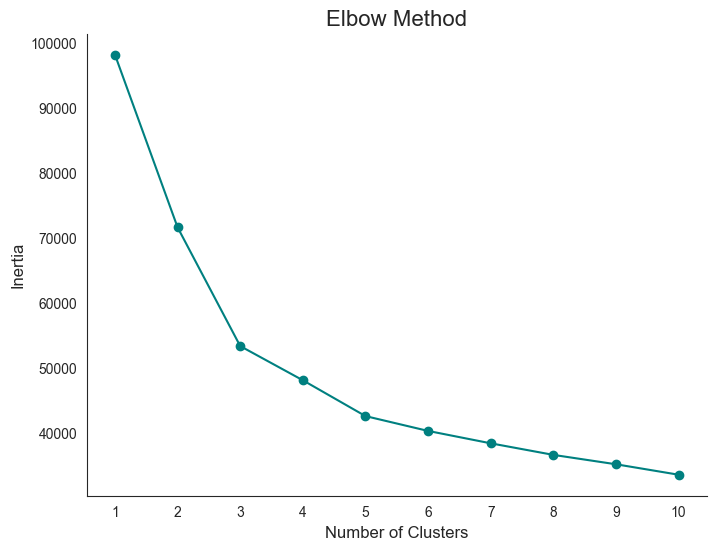

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_values, color=color, marker='o')
plt.title('Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=fontsize)
plt.ylabel('Inertia', fontsize=fontsize)
plt.xticks(range(1, 11), fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

> **Note:** From the plot, it is evident that 5 is a reasonable number of centroids for the clusters. Considering that there is no significant difference between using 5 and 6 clusters in Within-Cluster Sum of Squares (WCSS) , we will set the number of clusters to **5** .

 ### K-means

 Create a K-means clustering model

In [59]:
kmeans = KMeans(n_clusters=5, n_init='auto')

Fit the model to the data

In [60]:
kmeans.fit(df_features)

KMeans(n_clusters=5, n_init='auto')

Visualize the clusters

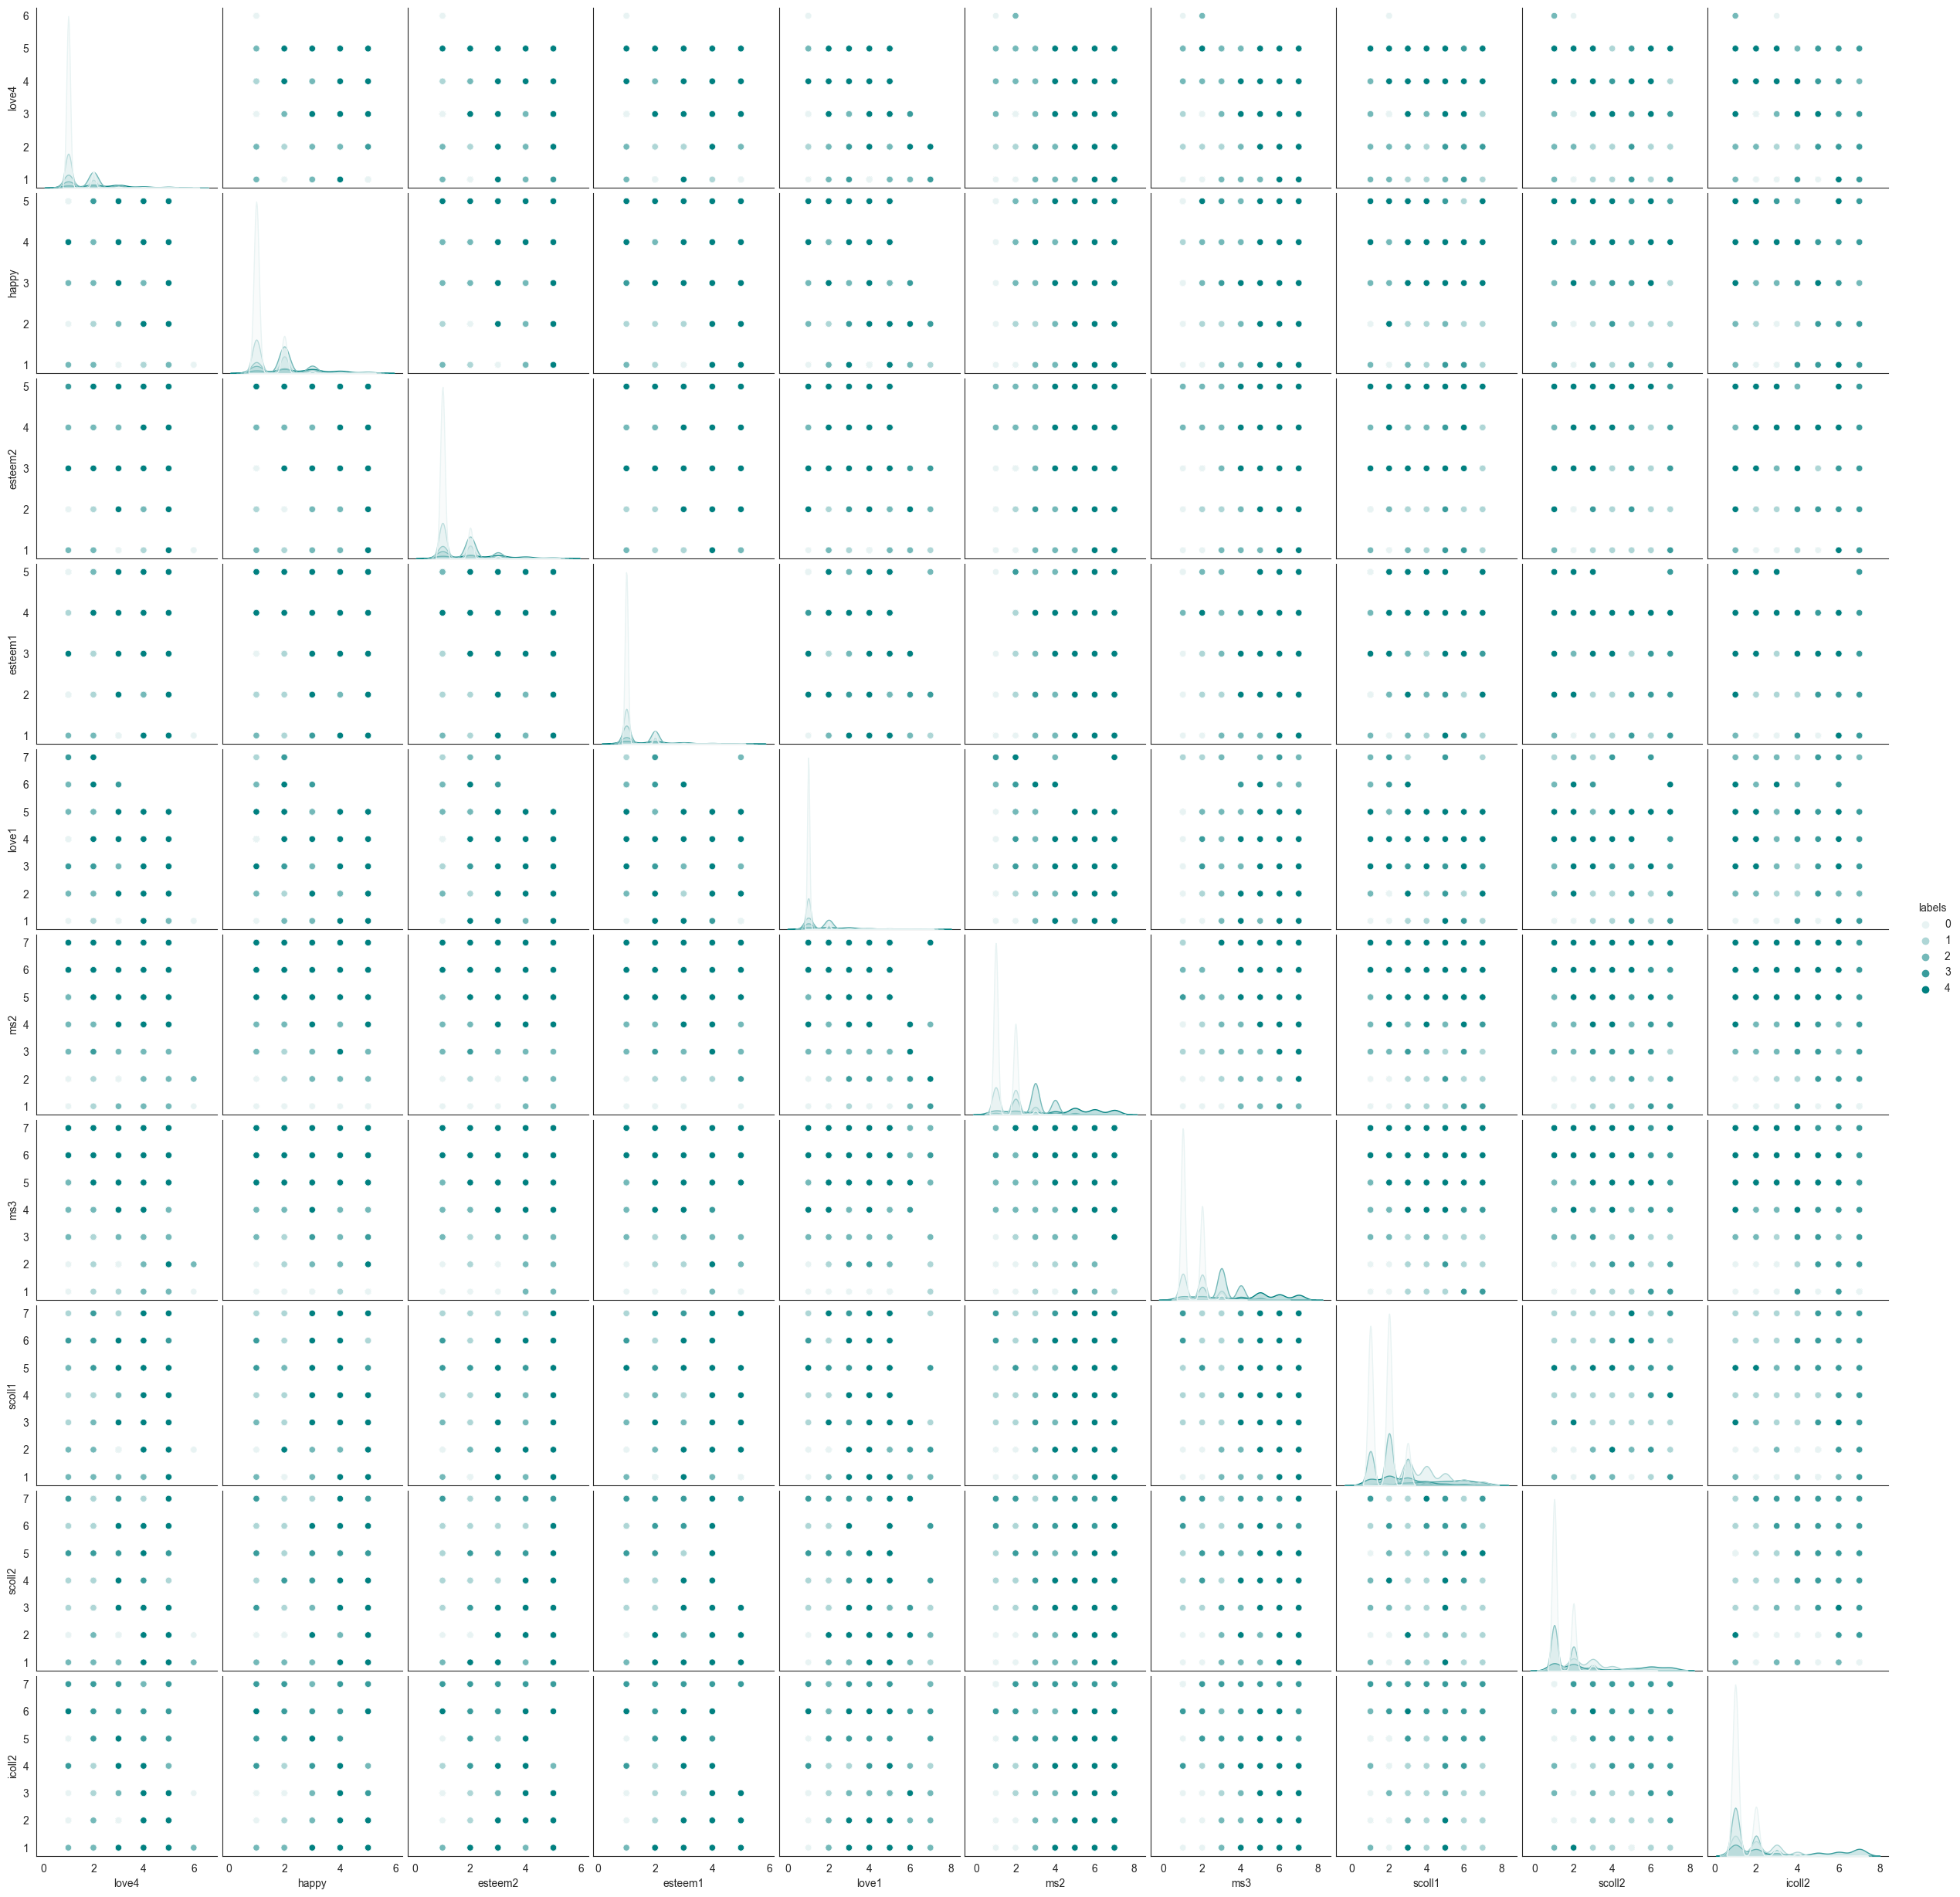

In [61]:
df_labeles = pd.DataFrame(kmeans.labels_)
df_labeled = pd.concat((df_features,df_labeles),axis=1)
df_labeled = df_labeled.rename({0:'labels'},axis=1)

sns.pairplot(df_labeled,hue='labels', palette = palette)

## Association Rule Mining (ARM)

### FP-Growth algorithm

Convert DataFrame to a list of transactions

In [62]:
transactions = df_features.values.tolist()

Perform frequent pattern mining using FP-Growth

In [63]:
patterns = pyfpgrowth.find_frequent_patterns(transactions, 1)

Set the minimum support threshold

In [64]:
min_support_threshold = 0.1

Filter patterns based on support

In [65]:
filtered_patterns = {pattern: support for pattern, support in patterns.items() if support >= min_support_threshold}

Generate association rules

In [66]:
rules = pyfpgrowth.generate_association_rules(filtered_patterns, 0.5)

Sort the rules by confidence in descending order

In [67]:
sorted_rules = sorted(rules.items(), key=lambda x: x[1][1], reverse=True)

Display top 10 Rules based on Confidence

In [68]:
count = 1
for rule, (support,confidence) in sorted_rules:
    if count > 10 :
        break
    if support and confidence:
        print(f"Rule {count}: {rule} Support: {support} Confidence: {confidence}")
        count= count +1

Rule 1: (1, 3, 3, 3, 5, 6, 7) Support: (2,) Confidence: 3.0
Rule 2: (5, 5, 5, 5, 5, 7, 7) Support: (2,) Confidence: 3.0
Rule 3: (1, 4, 5, 5, 5, 5, 6) Support: (2,) Confidence: 3.0
Rule 4: (4, 5, 5, 6, 7, 7) Support: (1, 2) Confidence: 2.3333333333333335
Rule 5: (1, 4, 5, 5, 6, 7, 7) Support: (2,) Confidence: 2.3333333333333335
Rule 6: (3, 3, 3, 7, 7, 7) Support: (2,) Confidence: 2.3333333333333335
Rule 7: (3, 5, 6, 6, 6, 7) Support: (4,) Confidence: 2.25
Rule 8: (1, 1, 6, 6, 6, 6) Support: (2,) Confidence: 2.25
Rule 9: (3, 3, 3, 5, 7, 7, 7) Support: (2,) Confidence: 2.2
Rule 10: (3, 6, 6, 7, 7, 7) Support: (2, 5) Confidence: 2.0


---
# Model Evaluation

## Classification

### Calculate evaluation metrics

 Decision Tree

In [69]:
DTC_accuracy = accuracy_score(y_test, DTC_pred)
DTC_precision = precision_score(y_test, DTC_pred, average='macro')
DTC_recall = recall_score(y_test, DTC_pred, average='macro')
DTC_f1 = f1_score(y_test, DTC_pred, average='macro')
DTC_scores = [DTC_accuracy, DTC_precision, DTC_recall, DTC_f1]

Naive Bayes

In [70]:
GNB_accuracy = accuracy_score(y_test, GNB_pred)
GNB_precision = precision_score(y_test, GNB_pred, average='macro')
GNB_recall = recall_score(y_test, GNB_pred, average='macro')
GNB_f1 = f1_score(y_test, GNB_pred, average='macro')
GNB_scores = [GNB_accuracy, GNB_precision, GNB_recall, GNB_f1]

 Support Vector Machines (SVM)

In [71]:
SVM_accuracy = accuracy_score(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred, average='weighted')
SVM_recall = recall_score(y_test, SVM_pred, average='weighted')
SVM_f1 = f1_score(y_test, SVM_pred, average='weighted')
SVM_scores = [SVM_accuracy, SVM_precision, SVM_recall, SVM_f1]

### Plot the Result

#### Compare the Models

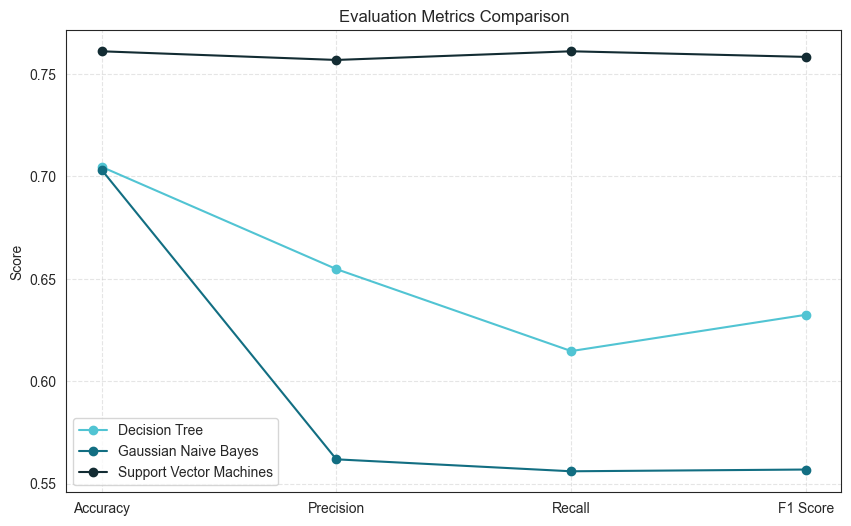

In [72]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = range(len(metrics))

plt.figure(figsize=(10, 6))

plt.plot(x, DTC_scores, label='Decision Tree', marker='o', color = '#51C4D3')
plt.plot(x, GNB_scores, label='Gaussian Naive Bayes', marker='o',color = '#126E82')
plt.plot(x, SVM_scores, label='Support Vector Machines', marker='o',color = '#132C33')

plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Evaluation Metrics Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)


plt.show()

#### plot the confusion matrix

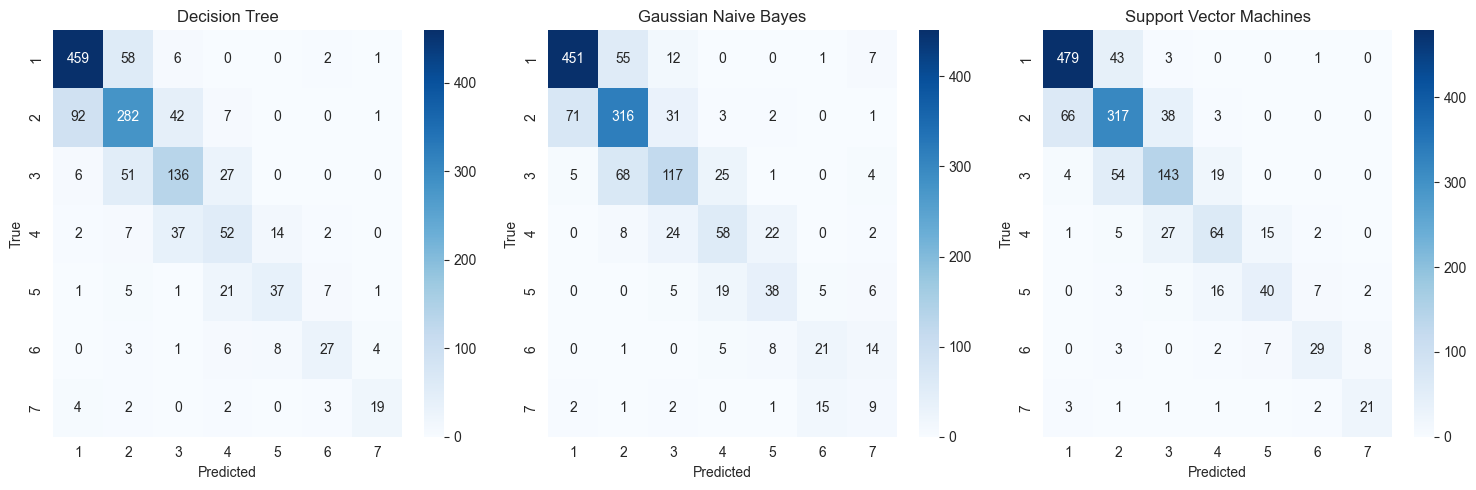

In [73]:
classifiers = [DTC, GNB, SVM]
classifier_names = ['Decision Tree', 'Gaussian Naive Bayes', 'Support Vector Machines'] 
class_names = DTC.classes_

fig, axes = plt.subplots(nrows=1, ncols=len(classifiers), figsize=(15, 5))

for i, clf in enumerate(classifiers):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=axes[i], xticklabels=class_names, yticklabels=class_names)
    axes[i].set_title(classifier_names[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

## Clustering

 ### K-means

#### Silhouette Coefficients Score

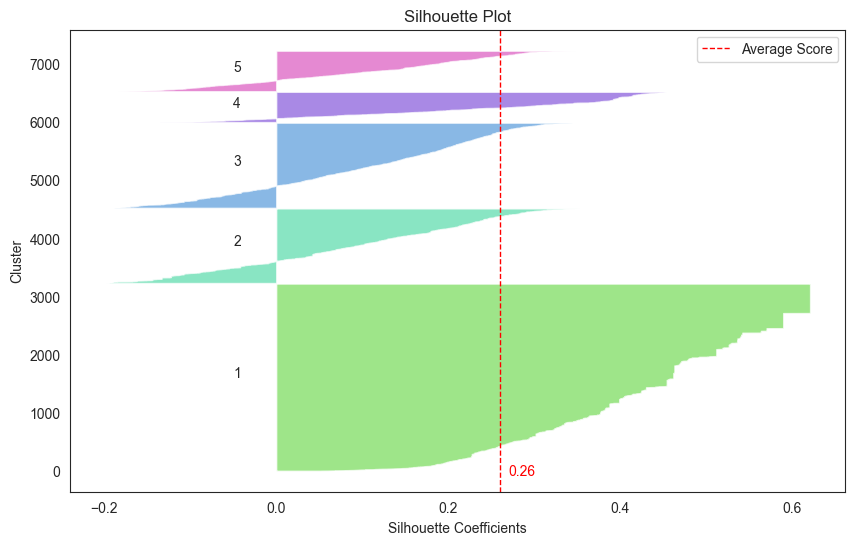

In [88]:
labels = kmeans.labels_
silhouette_vals = silhouette_samples(df_features, labels)
silhouette_avg = np.mean(silhouette_vals)

fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10

for i in range(5):
    
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size
    color = sns.color_palette("hls", 7)[i+2]
    ax.fill_betweenx(range(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i+1))
    y_lower = y_upper + 10
    
ax.set_title('Silhouette Plot')
ax.set_xlabel('Silhouette Coefficients')
ax.set_ylabel('Cluster')

ax.axvline(x=silhouette_avg, color='red', linestyle='--', linewidth=1, label='Average Score')
ax.text(silhouette_avg + 0.01, 0, f'{silhouette_avg:.2f}', color='red', verticalalignment='center')

ax.legend()
plt.show()

## Association Rule Mining (ARM)

### FP-Growth algorithm

# Interpretation of Results

results showcase and analysis 

conclusion